In [131]:
import json
import pickle
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

sns.set_style("darkgrid")

In [87]:
#### Settings
### Learning Rate for 2NN = 0.1, no learning rate decay
### Learning Rate for CNN = 0.01, no learning rate decay

In [88]:
os.chdir("/home/bahy/research/icl-prelab-assignment/")

In [89]:
!pwd

/home/bahy/research/icl-prelab-assignment


In [90]:
datas = []
for file_name in glob("logs_q2/*.txt"):
    print(file_name)
    file = open(file_name, "rb")
    for data in file.readlines():
        if len(data) < 10: # Ignoring blank space/not useful information
            continue
        dict_data = eval(data)
        dict_data['setting'] = file_name.split("/")[1].split("-")[0]
        dict_data['model'] = file_name.split("/")[1].split("-")[-1].split(".")[0]
        datas.append(dict_data)
        
datas = pd.DataFrame(datas)

logs_q2/NONIID-B10-C1.0-MNIST-2NN.txt
logs_q2/IID-B600-C0.1-MNIST-2NN.txt
logs_q2/NONIID-B10-C0.0-MNIST-CNN.txt
logs_q2/NONIID-B10-C0.1-MNIST-CNN.txt
logs_q2/IID-B10-C0.1-MNIST-2NN.txt
logs_q2/IID-B600-C0.0-MNIST-2NN.txt
logs_q2/IID-B600-C1.0-MNIST-CNN.txt
logs_q2/NONIID-B10-C0.1-MNIST-2NN.txt
logs_q2/NONIID-B10-C0.0-MNIST-2NN.txt
logs_q2/IID-B600-C0.0-MNIST-CNN.txt
logs_q2/NONIID-B600-C0.1-MNIST-2NN.txt
logs_q2/IID-B10-C1.0-MNIST-CNN.txt
logs_q2/IID-B10-C0.0-MNIST-2NN.txt
logs_q2/NONIID-B600-C0.1-MNIST-CNN.txt
logs_q2/NONIID-B600-C0.0-MNIST-2NN.txt
logs_q2/IID-B10-C0.0-MNIST-CNN.txt
logs_q2/IID-B600-C0.1-MNIST-CNN.txt
logs_q2/NONIID-B600-C0.0-MNIST-CNN.txt
logs_q2/IID-B10-C0.1-MNIST-CNN.txt
logs_q2/IID-B10-C1.0-MNIST-2NN.txt


In [91]:
# Sort the data
ROUNDING_DIGIT = 4

df_metrics = datas.sort_values(by=['setting', 'B', 'C', 'comm_round']).reset_index(drop=True)
df_metrics['train_acc'] = df_metrics['train_acc'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['test_acc'] = df_metrics['test_acc'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['train_loss'] = df_metrics['train_loss'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['test_loss'] = df_metrics['test_loss'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics.head()

,C,B,comm_round,train_acc,test_acc,train_loss,test_loss,setting,model
0,0.0,10,1,0.7448,0.7448,4.0410,4.0120,IID,2NN
1,0.0,10,1,0.8952,0.8988,1.6601,1.5963,IID,CNN
2,0.0,10,2,0.8134,0.8164,2.9616,2.9090,IID,2NN
3,0.0,10,2,0.9079,0.9117,1.4647,1.3977,IID,CNN
4,0.0,10,3,0.8047,0.8138,3.0942,2.9425,IID,2NN


In [92]:
df_metrics.tail()

,C,B,comm_round,train_acc,test_acc,train_loss,test_loss,setting,model
20790,0.1,600,2172,0.9769,0.9698,0.3633,0.4803,NONIID,2NN
20791,0.1,600,2173,0.9774,0.9694,0.3567,0.4809,NONIID,2NN
20792,0.1,600,2174,0.9776,0.9693,0.3532,0.4873,NONIID,2NN
20793,0.1,600,2175,0.9776,0.9693,0.3530,0.4849,NONIID,2NN
20794,0.1,600,2176,0.9778,0.9701,0.3496,0.4740,NONIID,2NN


In [93]:
df_metrics.groupby(["model", "setting", "B", "C"]).size()

model  setting  B    C  
2NN    IID      10   0.0     127
                     0.1      53
                     1.0      45
                600  0.0    2449
                     0.1    2526
       NONIID   10   0.0    2764
                     0.1    1138
                     1.0    1176
                600  0.0    2620
                     0.1    2176
CNN    IID      10   0.0      23
                     0.1      13
                     1.0      13
                600  0.0     449
                     0.1     402
                     1.0     426
       NONIID   10   0.0     735
                     0.1     922
                600  0.0    1118
                     0.1    1620
dtype: int64

In [130]:
table_df = df_metrics.groupby(["model", "setting", "B", "C"]).size().to_frame('comm_round').reset_index()
table_df

,model,setting,B,C,comm_round
0,2NN,IID,10,0.0,127
1,2NN,IID,10,0.1,53
2,2NN,IID,10,1.0,45
3,2NN,IID,600,0.0,2449
4,2NN,IID,600,0.1,2526
5,2NN,NONIID,10,0.0,2764
6,2NN,NONIID,10,0.1,1138
7,2NN,NONIID,10,1.0,1176
8,2NN,NONIID,600,0.0,2620
9,2NN,NONIID,600,0.1,2176


In [94]:
def plot_monotonic_acc(input_df, metrics=["test", "train"]):
    
    min_ylim = []
    for metric in metrics:
        max_val = input_df['%s_acc' % metric][0]
        keep = []
    
        for i in range(len(sample_df)):
            current = input_df['%s_acc' % metric][i]
            if max_val <= current:
                keep.append(input_df['comm_round'].index[i])
                max_val = current          
        
        sns.lineplot(data=input_df.iloc[keep], x='comm_round', y='%s_acc' % metric, label="%s_acc" % metric)
        min_ylim.append(input_df.iloc[keep]['%s_acc' % metric].min())
    
    plt.ylim(max(min_ylim), None)
    plt.ylabel("Accuracy")
    plt.xlabel("Communication Rounds")
    plt.title("MNIST %s %s\nB=%s, C=%s" % (input_df['model'].unique()[0], input_df['setting'].unique()[0],\
                                             input_df['B'].unique()[0], input_df['C'].unique()[0]))
    plt.legend(loc='lower right')
    plt.show()

In [95]:
def plot_monotonic_loss(input_df, metrics=["test", "train"]):
    
    max_ylim = []
    for metric in metrics:
        min_val = input_df['%s_loss' % metric][0]
        keep = []
    
        for i in range(len(sample_df)):
            current = input_df['%s_loss' % metric][i]
            if min_val >= current:
                keep.append(input_df['comm_round'].index[i])
                min_val = current          
        
        sns.lineplot(data=input_df.iloc[keep], x='comm_round', y='%s_loss' % metric, label="%s_loss" % metric)
        max_ylim.append(input_df.iloc[keep]['%s_loss' % metric].max())
    
    plt.ylim(None, min(max_ylim))
    plt.ylabel("Loss")
    plt.xlabel("Communication Rounds")
    plt.title("MNIST %s %s\nB=%s, C=%s" % (input_df['model'].unique()[0], input_df['setting'].unique()[0],\
                                             input_df['B'].unique()[0], input_df['C'].unique()[0]))
    plt.legend(loc='upper right')
    plt.show()

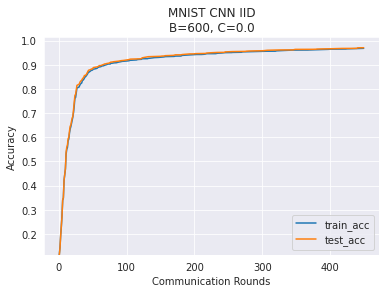

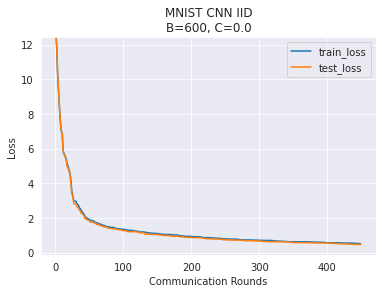

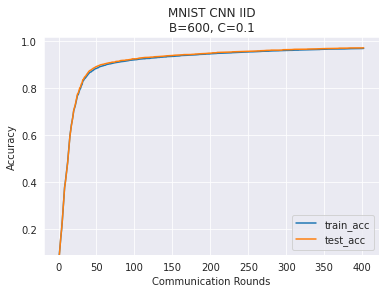

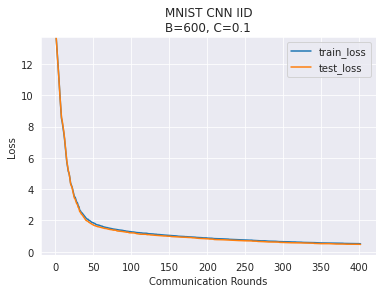

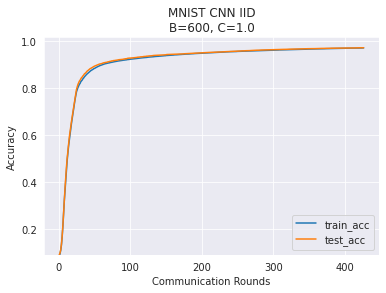

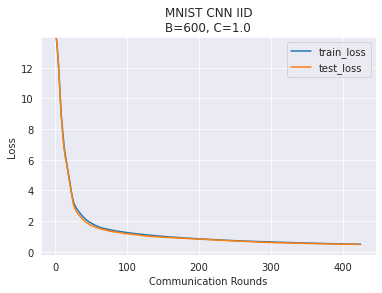

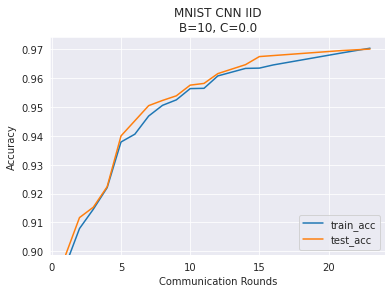

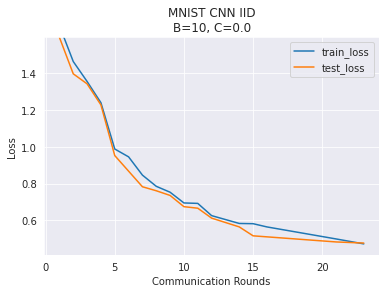

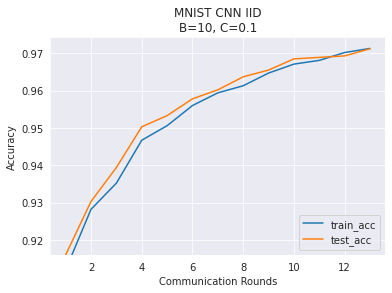

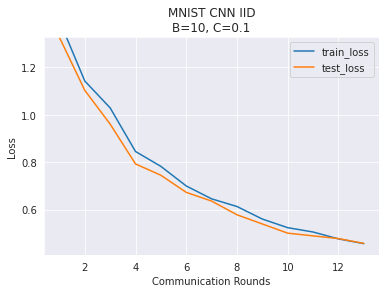

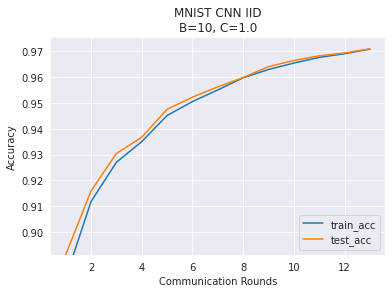

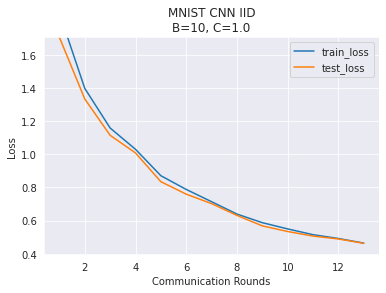

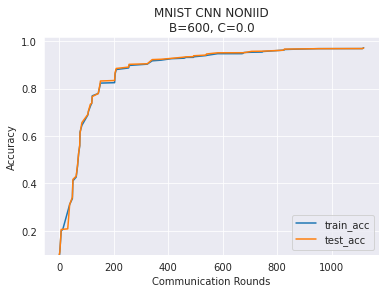

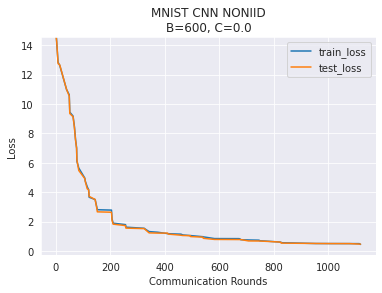

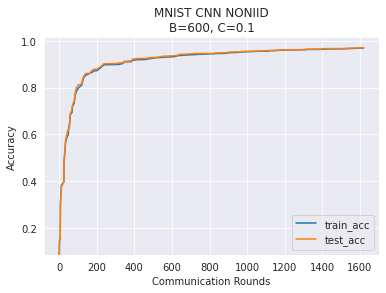

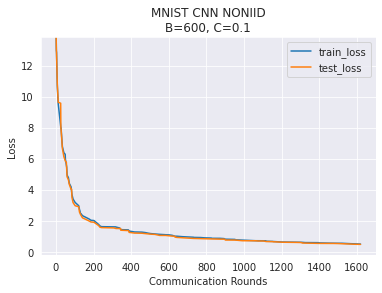

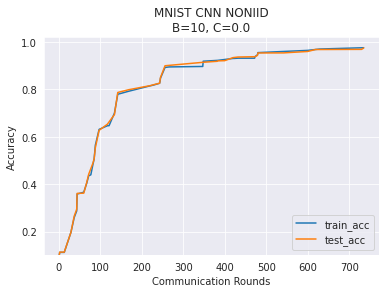

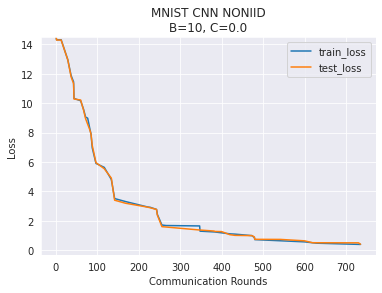

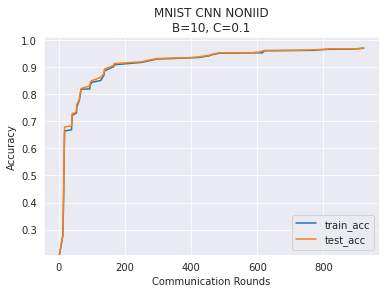

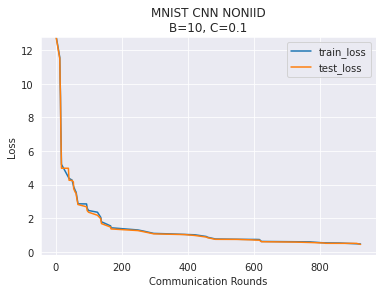

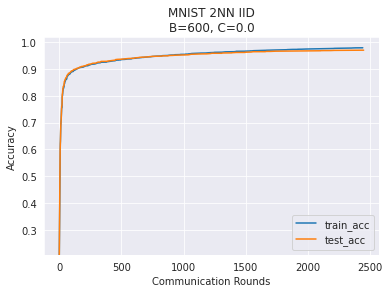

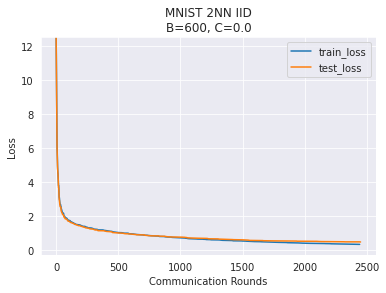

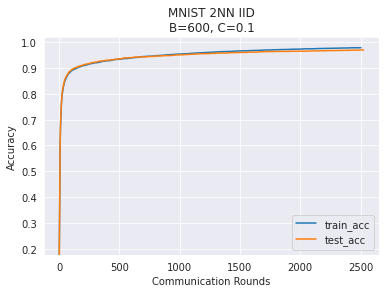

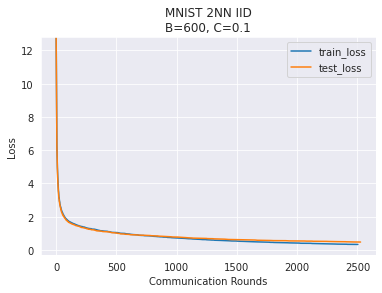

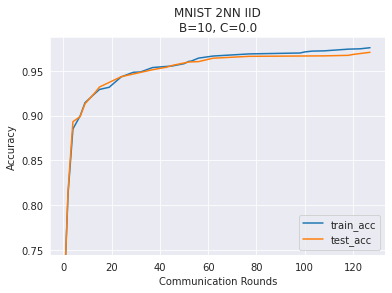

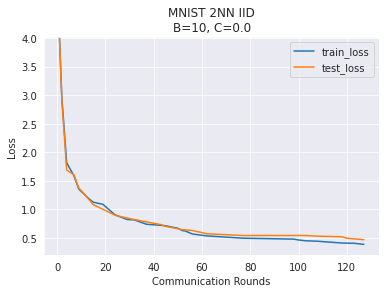

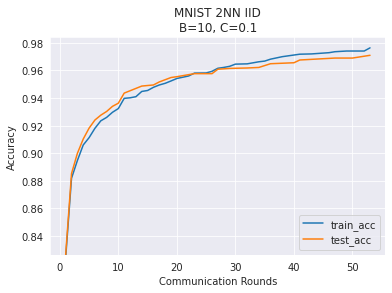

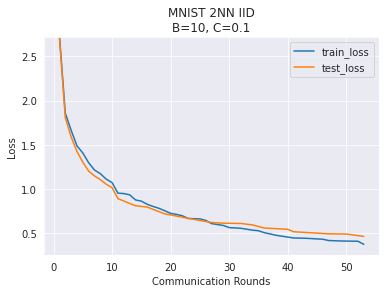

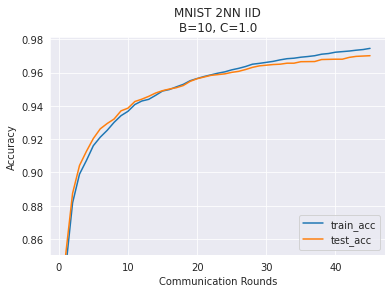

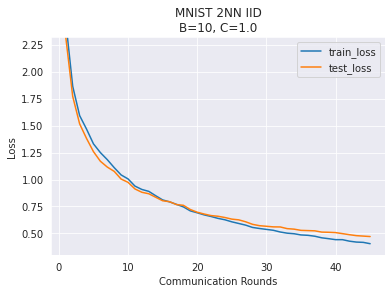

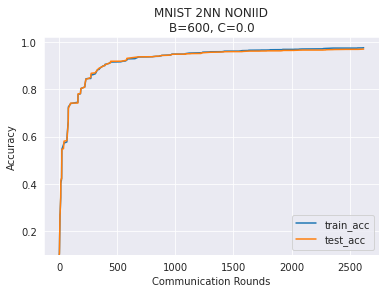

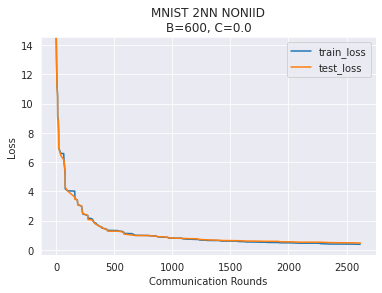

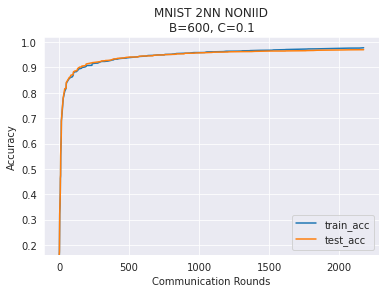

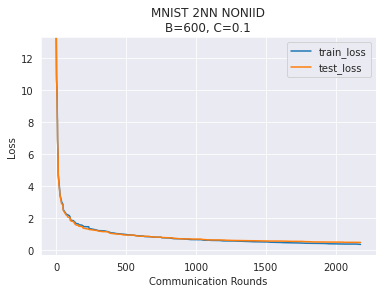

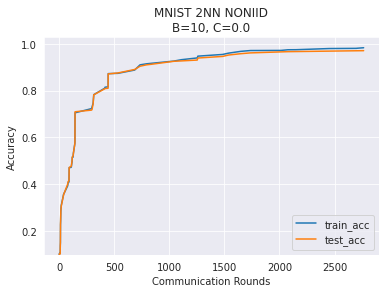

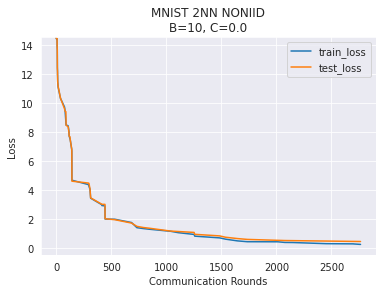

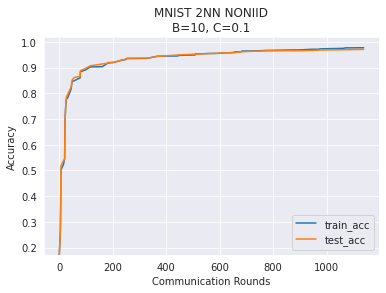

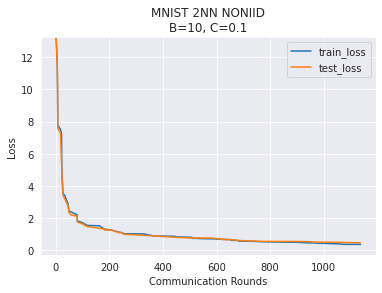

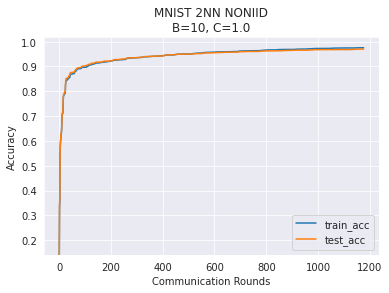

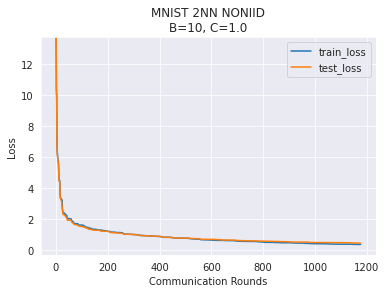

In [96]:
# Plot all accuracy and losses
MODELS = ["CNN", "2NN"]
SETTINGS = ["IID", "NONIID"]
BATCHES = [600, 10]
C_FRACTIONS = [0.0, 0.1, 1.0]

for model in MODELS:
    for setting in SETTINGS:
        for b in BATCHES:
            for c in C_FRACTIONS:
                sample_df = df_metrics[(df_metrics['B']==b) & (df_metrics['C']==c)\
                                       & (df_metrics['setting']==setting) & (df_metrics['model']==model)]\
                                        .reset_index(drop=True)
                if len(sample_df) == 0:
                    continue
                plot_monotonic_acc(sample_df, ['train', 'test'])
                plot_monotonic_loss(sample_df, ['train', 'test'])